In [1]:
from Defaults import defaults
from Defaults import city

from FlightRadar24.api import FlightRadar24API
fr_api = FlightRadar24API()

from PIL import Image
import requests
from io import BytesIO

from matplotlib import pyplot as plt

import folium

In [2]:
c1 = city.City(defaults.Tehran)

In [3]:
c1.printer()

Welcome to Tehran
Bound 35.90,35.00,51.10,51.70 is under observation!
Airports within the range:
   Tehran Mehrabad International Airport/OIII
   Located on: [35.689159, 51.313412]
   Tehran Imam Khomeini International Airport/OIIE
   Located on: [35.416111, 51.152222]


In [4]:
c1.get_bound()

'35.90,35.00,51.10,51.70'

In [5]:
bound = c1.get_bound()
flights = fr_api.get_flights(bounds = bound)

In [6]:
flights

[<(A321) EP-LCT - Altitude: 6125 - Ground Speed: 194 - Heading: 264>,
 <(B735) EP-RBC - Altitude: 28000 - Ground Speed: 414 - Heading: 280>]

In [7]:
details = fr_api.get_flight_details(flights[0].id)
flights[0].set_flight_details(details)

In [8]:
img = flights[0].aircraft_images

In [9]:
aircraft = details['aircraft']
airline = details['airline']

if details['airport']['origin'] != None:
    origin = details['airport']['origin']
else:
    origin = None
    
if details['airport']['destination'] != None:
    destination = details['airport']['destination']
else:
    destination = None

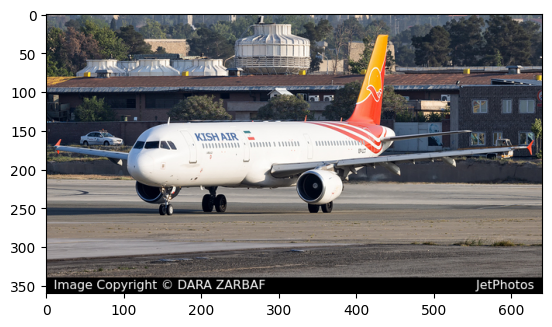

A321 :  Kish Air / KIS
It has taken off from: Tehran Mehrabad International Airport in Tehran/Iran
Fly to: Mashhad International Airport in Mashhad/Iran


In [10]:
response = img['large'][0]['src']
response = requests.get(response)
img2 = Image.open(BytesIO(response.content))

# Show the loaded image
#img2.show()

plt.imshow(img2,cmap='gray')
plt.show()
if airline != None:
    print(aircraft['model']['code'], ": ", airline['name'], "/", airline['code']['icao'])

    
if origin != None:
    print("It has taken off from: ", origin['name'], " in ", origin['position']['region']['city'], "/", origin['position']['country']['name'], sep = "")
else:
    print("I can not get data From API")
    
    
if destination != None:
    print("Fly to: ", destination['name'], " in ", destination['position']['region']['city'], "/", destination['position']['country']['name'], sep = "")
else:
    print("I can not get data From API")